In [56]:
from scipy import misc, sparse
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from skimage import io
import warnings
import json
warnings.filterwarnings('ignore')

from shapely.geometry.polygon import LinearRing, Polygon
from shapely.geometry.point import Point

import pickle


# Utils

colorsHex = [
    '#FFFFFF',
    '#E4E4E4',
    '#888888',
    '#222222',
    '#FFA7D1',
    '#E50000',
    '#E59500',
    '#A06A42',
    '#E5D900',
    '#94E044',
    '#02BE01',
    '#00E5F0',
    '#0083C7',
    '#0000EA',
    '#E04AFF',
    '#820080'
]


def HexToRGB(hexStr):
    return tuple(int(hexStr.strip('#')[i:i+2], 16) for i in (0, 2 ,4))

def RGBToHex(value):
    return ('#%02x%02x%02x' % (value[0], value[1], value[2])).upper()

def idxToHex(idx):
    return colorsHex[idx]

def idxToRGB(idx):
    return HexToRGB(colorsHex[idx])

def HexToIdx(hexStr):
    return colorsHex.index(hexStr)

def RGBToIdx(rgb):
    return HexToIdx(RGBToHex(rgb))

def showImage(image, size=(12,12), ax=None):
    if not ax:
        _, ax = plt.subplots(1,1, figsize=size)
    ax.imshow(image.transpose((1,0,2)), interpolation='nearest')
    ax.grid(False)
def saveArray(array, fileName):
    if not fileName.endswith(".npy"):
        fileName += ".npy"
    with open(fileName, 'wb') as outfile:
        np.save(outfile, array)
def loadArray(fileName):
    if not fileName.endswith(".npy"):
        fileName += ".npy"
    with open(fileName, 'rb') as inFile:
        return np.load(inFile)
    
with open('atlas.json', 'r') as infile:
    atlas = json.load(infile)
    
canvas_final = loadArray('../canvas_final.npy')

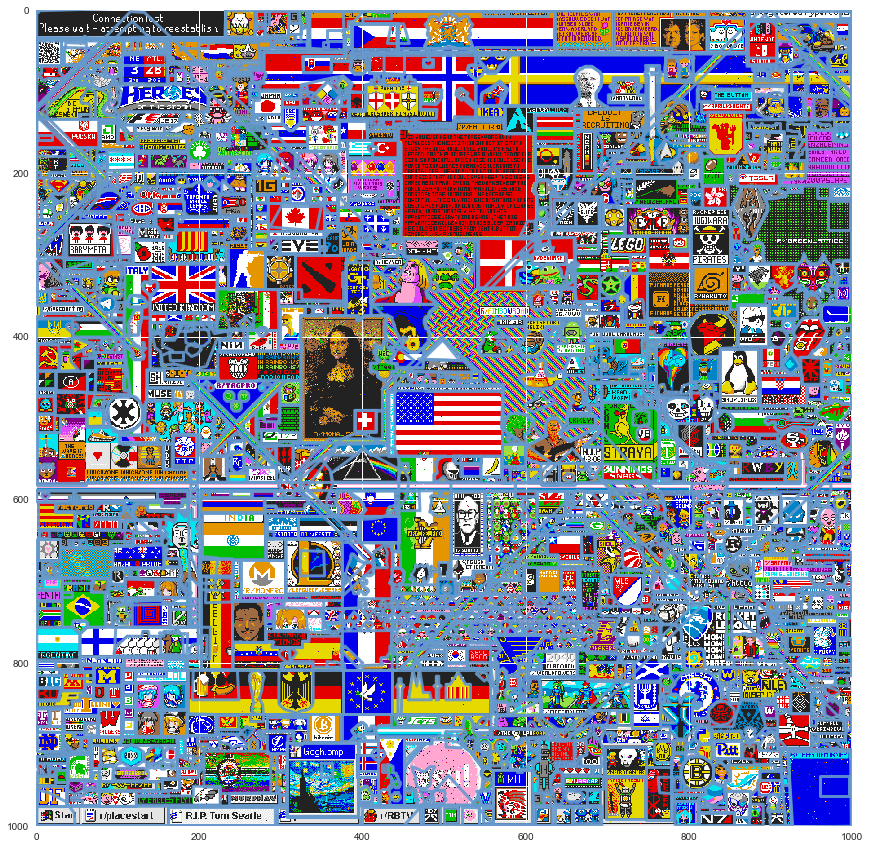

In [57]:
plt.figure(figsize=(15,15))

for item in atlas:
    path = item['path'][:]
    if len(path) < 3:
        continue
    path.append(item['path'][0])
    path = np.array(path)
    poly = Polygon(path)
    item['poly'] = poly
    x,y = poly.exterior.xy
    plt.plot(x, y, color='#6699cc', alpha=0.9,
        linewidth=3, solid_capstyle='round', zorder=2)
plt.imshow(canvas_final.transpose((1,0,2)), interpolation='nearest')
plt.xlim(0,1000)
plt.ylim(1000,0);

In [58]:
with open('atlas.pickle', 'wb') as outfile:
    pickle.dump(atlas, outfile)

In [59]:
with open('atlas.pickle', 'rb') as infile:
    atlas = pickle.load(infile)

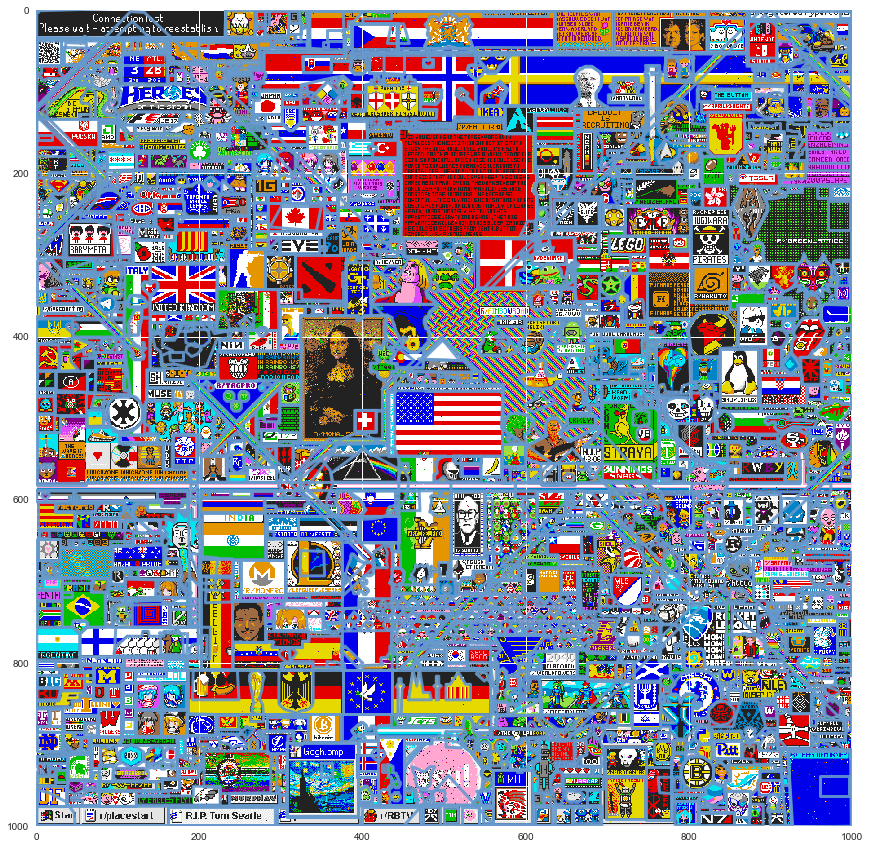

In [60]:
plt.figure(figsize=(15,15))

for item in atlas:
    if not 'poly' in item:
        continue
    poly = item['poly']
    x,y = poly.exterior.xy
    plt.plot(x, y, color='#6699cc', alpha=0.9,
        linewidth=3, solid_capstyle='round', zorder=2)
plt.imshow(canvas_final.transpose((1,0,2)), interpolation='nearest')
plt.xlim(0,1000)
plt.ylim(1000,0);

In [64]:
atlas[0]

{'center': [862.5, 449.5],
 'description': 'Tux is the official mascot of the Linux operating system.',
 'id': 0,
 'name': 'Tux (Linux Mascot)',
 'path': [[838.5, 415.5], [838.5, 483.5], [886.5, 483.5], [886.5, 415.5]],
 'poly': <shapely.geometry.polygon.Polygon at 0x7f2811156a58>,
 'subreddit': 'linux',
 'website': ''}

In [65]:
atlas[0]['poly'].contains(Point(850, 450))

True

In [66]:
atlas[0]['poly'].contains(Point(810, 450))

False